**Satellite Image Processing** 

Felicite - tool used to download satellite image from command line

2D - Terrestial
3D - Includes altitute
4D - 3D with time series

**Libraries**
rasterio
GDAL's *
cartopy

**Active Sensors** - capture reflected light
**Passive Sensors** - capture using rays

-> Reflected Light from different wavelengths are recorded and thier intensity is stored.

-> Leads to formation of **BANDS** in satellite data

-> **Resolution** - Refers to size of 1 px on ground.

**Data Storage**
raster,vector
Bands - GeoTIFF/NetCDF

**STEPS**
1. Fetch data
    
2. Processing Data
3. Meaningful insights






landat-8 dATA -> Its a data used to geosense the Earths geographical data.

We will use RASTERIO library, used for processing raster data. It is a format used to store digital photos in detailed graphic

In [ ]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
#import bands as separate 1 band raster
# A band is a portion of the electromagnetic spectrum sensed by a satellite. 
# You can think of it as a color, but often some of the bands will be in the infrared and invisible to the human eye.

band4 = rasterio.open('/content/LC08_L1TP_042035_20180603_20180615_01_T1_B4_clip.tif') #red
band5 = rasterio.open('/content/LC08_L1TP_042035_20180603_20180615_01_T1_B5_clip.tif') #nir

In [ ]:
#number of raster rows
band4.height

1338

In [ ]:
#number of raster columns
band4.width

2107

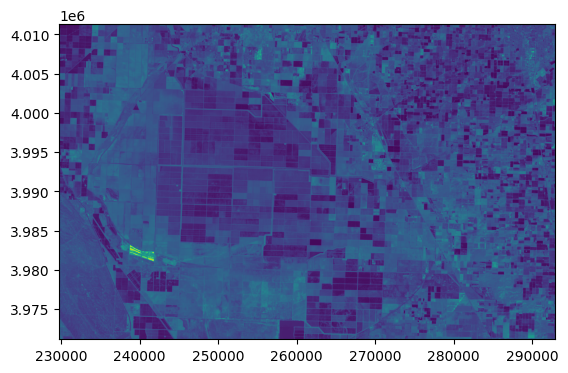

<Axes: >

In [ ]:
#plot band 
plot.show(band4)

In [ ]:
#type of raster byte
band4.dtypes

('uint16',)

In [ ]:
#raster sytem of reference
band4.crs

CRS.from_epsg(32611)

In [ ]:
#raster transform parameters
band4.transform

Affine(30.0, 0.0, 229755.0,
       0.0, -30.0, 4011285.0)

In [ ]:
#raster values as matrix array
band4.read(1)

array([[ 7479,  7474,  7472, ...,  8970,  9186,  9849],
       [ 7482,  7488,  7477, ...,  9048,  9151,  9667],
       [ 7497,  7468,  7454, ...,  9115,  9150, 10156],
       ...,
       [17295, 16415, 16222, ..., 11569, 11376, 11254],
       [17162, 16303, 15322, ..., 11617, 11278, 11115],
       [16905, 16026, 15720, ..., 12508, 12893, 13168]], dtype=uint16)

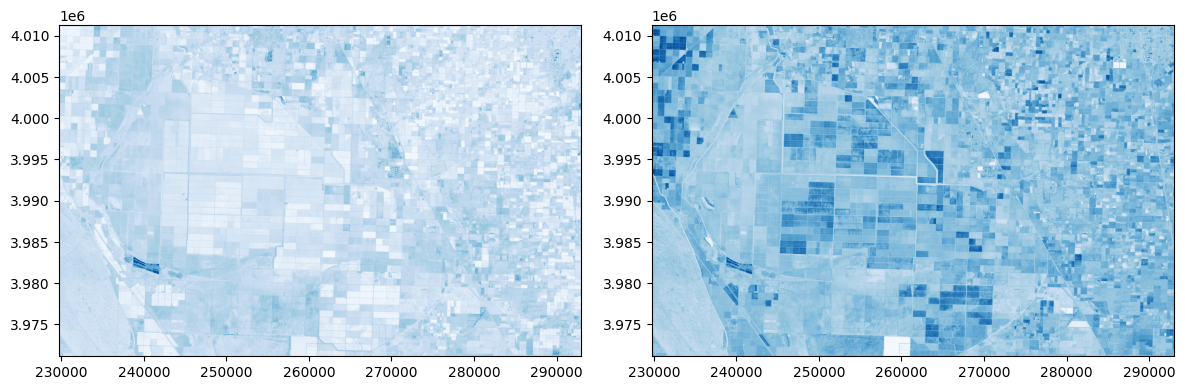

In [ ]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
# plot.show(band4, ax=ax1, cmap='nipy_spectral_r') #red
# plot.show(band5, ax=ax2, cmap='Dark2_r') #nir
fig.tight_layout()

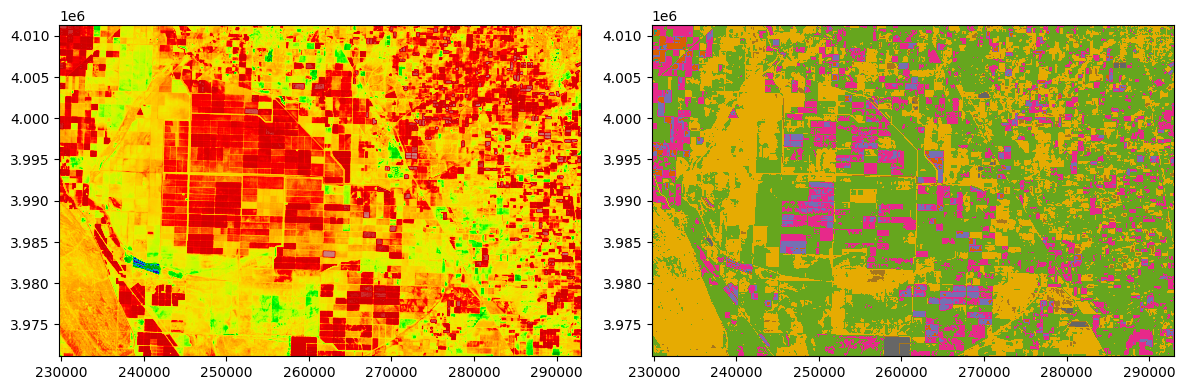

In [ ]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# plot.show(band4, ax=ax1, cmap='Blues') #red
# plot.show(band5, ax=ax2, cmap='Blues') #nir
plot.show(band4, ax=ax1, cmap='nipy_spectral_r') #red
plot.show(band5, ax=ax2, cmap='Dark2_r') #nir
fig.tight_layout()

In [ ]:
#generate nir and red objects as arrays in float64 format
red = band4.read(1).astype('float64')
nir = band5.read(1).astype('float64')
print(red)
print(nir)

[[ 7479.  7474.  7472. ...  8970.  9186.  9849.]
 [ 7482.  7488.  7477. ...  9048.  9151.  9667.]
 [ 7497.  7468.  7454. ...  9115.  9150. 10156.]
 ...
 [17295. 16415. 16222. ... 11569. 11376. 11254.]
 [17162. 16303. 15322. ... 11617. 11278. 11115.]
 [16905. 16026. 15720. ... 12508. 12893. 13168.]]
[[24079. 24061. 24131. ...  9747. 10231. 11190.]
 [24169. 24213. 24173. ...  9900. 10084. 10855.]
 [24253. 24438. 24265. ...  9910. 10079. 11592.]
 ...
 [21594. 20611. 20397. ... 20179. 20035. 19973.]
 [21441. 20507. 19362. ... 20189. 19976. 19941.]
 [21080. 20536. 20172. ... 20531. 20744. 20915.]]


In [ ]:
#ndvi calculation, empty cells or nodata cells are reported as 0
# Here we are creating a new matrix from the MATRIX OF ABOVE 2 BANDS
ndvi=np.where(
    (nir+red)==0., 
    0, 
    (nir-red)/(nir+red))

ndvi

array([[0.52601559, 0.525987  , 0.5271335 , ..., 0.04151306, 0.05381882,
        0.06373877],
       [0.52721873, 0.52758588, 0.52751975, ..., 0.04496517, 0.04850533,
        0.05788909],
       [0.52774803, 0.53187488, 0.52999779, ..., 0.04178712, 0.04831244,
        0.06602906],
       ...,
       [0.1105454 , 0.11332577, 0.11401185, ..., 0.27119819, 0.27566776,
        0.2792135 ],
       [0.11084631, 0.1142081 , 0.11648022, ..., 0.2695089 , 0.27830038,
        0.28419629],
       [0.10991181, 0.12335211, 0.12403878, ..., 0.24283423, 0.23340369,
        0.22729807]])

In [ ]:
#export ndvi image
ndviImage = rasterio.open('/content/output.tif','w',driver='Gtiff',
                          width=band4.width, 
                          height = band4.height, 
                          count=1, crs=band4.crs, 
                          transform=band4.transform, 
                          dtype='float64')
ndviImage.write(ndvi,1)
ndviImage.close()

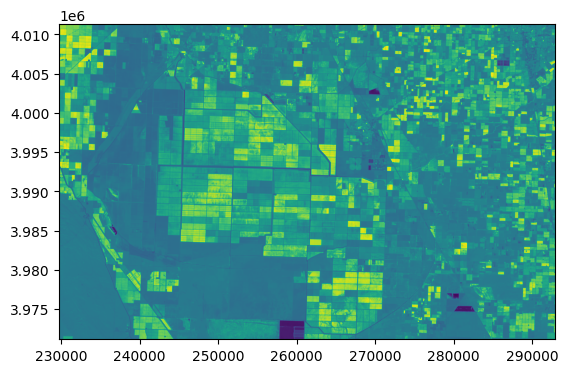

<Axes: >

In [ ]:
#plot ndvi
ndvi = rasterio.open('/content/output.tif')
fig = plt.figure()
plot.show(ndvi)